# Import necessary libraries
SAFEP_parse.py contains all the functions and library calls necessary to run the notebook
# Required libraries:
- numpy
- pandas
- matplotlib
- alchemlyb (pip install git+https://github.com/alchemistry/alchemlyb)
- natsort (for sorting file names)
- glob (for unix-like file paths)



# IMPORTANT: Make sure the temperature (set below) matches the temperature you used to run the simulations.

In [1]:
from AFEP_parse import *
plt.rcParams['figure.dpi'] = 150

In [2]:
def checkPaths(paths, nDone):
    goodpaths = []
    for path in paths:
        feps = glob(path+pattern)
        countDone = 0
        for fep in feps:
            with open(fep) as f:
                if 'Free' in f.read():
                    countDone+=1
        if countDone == nDone:
            goodpaths.append(path)
    
    return goodpaths

In [3]:
root = '/home/ems363/Documents/ELIC_DCDs_Analyses/PCPGPE211/'
pattern = 'PO*fepout'
prefix= 'POCE'
paths = glob(root+prefix+'*/')
header = 'PC:PG:PE 2:1:1'
checkReplicas = True
if checkReplicas:
    paths = checkPaths(paths, 41)

In [5]:
temperature = 303.15
RT = 0.00198720650096 * temperature # ca. 0.59kcal/mol
decorrelate = True #Flag for decorrelation of samples
detectEQ = False #Flag for automated equilibrium detection
DiscrepancyFitting = 'LS' #ML = fit PDF of discrepancies with a normal distribution maximum likelihood estimator. LS = fit CDF of discrepancies with a normal distribution least-squares estimator

In [6]:
u_nks, cumulative, perWindow, affix = batchProcess(paths, RT, decorrelate, pattern, temperature, detectEQ)

Reading /home/ems363/Documents/ELIC_DCDs_Analyses/PCPGPE211/POCG_115/


         lambda1 = 0.15, lambda2 = 0.175; inferring lambda_idws to be 0.125
         lambda1 = 0.3, lambda2 = 0.325; inferring lambda_idws to be 0.275
         lambda1 = 0.45, lambda2 = 0.475; inferring lambda_idws to be 0.425
         lambda1 = 0.6, lambda2 = 0.625; inferring lambda_idws to be 0.575
         lambda1 = 0.75, lambda2 = 0.775; inferring lambda_idws to be 0.725
         lambda1 = 0.9, lambda2 = 0.925; inferring lambda_idws to be 0.875
/u2/home_u2/ems363/miniconda3/envs/jupEnv/lib/python3.9/site-packages/alchemlyb/preprocessing/subsampling.py:135: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  return df.sort_index(0).reset_index('time').duplicated('time').any()
/u2/home_u2/ems363/miniconda3/envs/jupEnv/lib/python3.9/site-packages/alchemlyb/preprocessing/subsampling.py:133: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  return df.sort_index(0).reset_index('time

Decorrelating samples. Flag='True'
Reading /home/ems363/Documents/ELIC_DCDs_Analyses/PCPGPE211/POCG_22/


         lambda1 = 0.15, lambda2 = 0.175; inferring lambda_idws to be 0.125
         lambda1 = 0.3, lambda2 = 0.325; inferring lambda_idws to be 0.275
         lambda1 = 0.45, lambda2 = 0.475; inferring lambda_idws to be 0.425
         lambda1 = 0.6, lambda2 = 0.625; inferring lambda_idws to be 0.575
         lambda1 = 0.75, lambda2 = 0.775; inferring lambda_idws to be 0.725
         lambda1 = 0.9, lambda2 = 0.925; inferring lambda_idws to be 0.875


Decorrelating samples. Flag='True'
Reading /home/ems363/Documents/ELIC_DCDs_Analyses/PCPGPE211/POCG_5/


         lambda1 = 0.15, lambda2 = 0.175; inferring lambda_idws to be 0.125
         lambda1 = 0.3, lambda2 = 0.325; inferring lambda_idws to be 0.275
         lambda1 = 0.45, lambda2 = 0.475; inferring lambda_idws to be 0.425
         lambda1 = 0.6, lambda2 = 0.625; inferring lambda_idws to be 0.575
         lambda1 = 0.75, lambda2 = 0.775; inferring lambda_idws to be 0.725
         lambda1 = 0.9, lambda2 = 0.925; inferring lambda_idws to be 0.875


Decorrelating samples. Flag='True'
Reading /home/ems363/Documents/ELIC_DCDs_Analyses/PCPGPE211/POCG_62/


         lambda1 = 0.15, lambda2 = 0.175; inferring lambda_idws to be 0.125
         lambda1 = 0.3, lambda2 = 0.325; inferring lambda_idws to be 0.275
         lambda1 = 0.45, lambda2 = 0.475; inferring lambda_idws to be 0.425
         lambda1 = 0.6, lambda2 = 0.625; inferring lambda_idws to be 0.575
         lambda1 = 0.75, lambda2 = 0.775; inferring lambda_idws to be 0.725
         lambda1 = 0.9, lambda2 = 0.925; inferring lambda_idws to be 0.875


Decorrelating samples. Flag='True'
Reading /home/ems363/Documents/ELIC_DCDs_Analyses/PCPGPE211/POCG_95/


         lambda1 = 0.15, lambda2 = 0.175; inferring lambda_idws to be 0.125
         lambda1 = 0.3, lambda2 = 0.325; inferring lambda_idws to be 0.275
         lambda1 = 0.45, lambda2 = 0.475; inferring lambda_idws to be 0.425
         lambda1 = 0.6, lambda2 = 0.625; inferring lambda_idws to be 0.575
         lambda1 = 0.75, lambda2 = 0.775; inferring lambda_idws to be 0.725
         lambda1 = 0.9, lambda2 = 0.925; inferring lambda_idws to be 0.875


Decorrelating samples. Flag='True'


In [7]:
perWindow[('mean', 'df')] = np.mean(perWindow.loc[:, (slice(None), 'df')], axis=1)
perWindow[('mean', 'ddf')] = np.mean(perWindow.loc[:, (slice(None), 'ddf')], axis=1)
perWindow[('mean', 'dG_f')] = np.mean(perWindow.loc[:, (slice(None), 'dG_f')], axis=1)
perWindow[('mean', 'dG_b')] = np.mean(perWindow.loc[:, (slice(None), 'dG_b')], axis=1)

l0s = list(set(perWindow.columns.get_level_values(0)))
for key in l0s:
    perWindow[(key, 'diff')] = perWindow[(key, 'dG_f')]+perWindow[(key, 'dG_b')]
    
keys = set(cumulative.columns.get_level_values(0))
colors = ['#0072B2', '#D55E00', '#CC79A7', '#009E73', '#E69F00']
keyColors = {}
i = 0
for key in keys:
    keyColors[key] = colors[i]
    i += 1

In [8]:
print("Values in kcal/mol")
cumulative.loc[1, :]*RT

Values in kcal/mol


POCG_115  f        -16.206395
          errors     0.237404
POCG_22   f        -16.519704
          errors     0.268712
POCG_5    f        -15.074049
          errors     0.260637
POCG_62   f        -17.635481
          errors     0.196182
POCG_95   f        -14.475728
          errors     0.204796
Name: 1.0, dtype: float64

In [9]:
feps = np.sort(list(set(u_nks[l0s[1]].index.get_level_values(1))))

fs = {}
bs = {}
fes = {}
bes = {}

for l in [x for x in l0s if x != "mean"]:
    forward, forward_error, backward, backward_error = doConvergence(u_nks[l], feps)
    fs[l] = forward
    fes[l] = forward_error
    bs[l] = backward
    bes[l] = backward_error

/u2/home_u2/ems363/miniconda3/envs/jupEnv/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


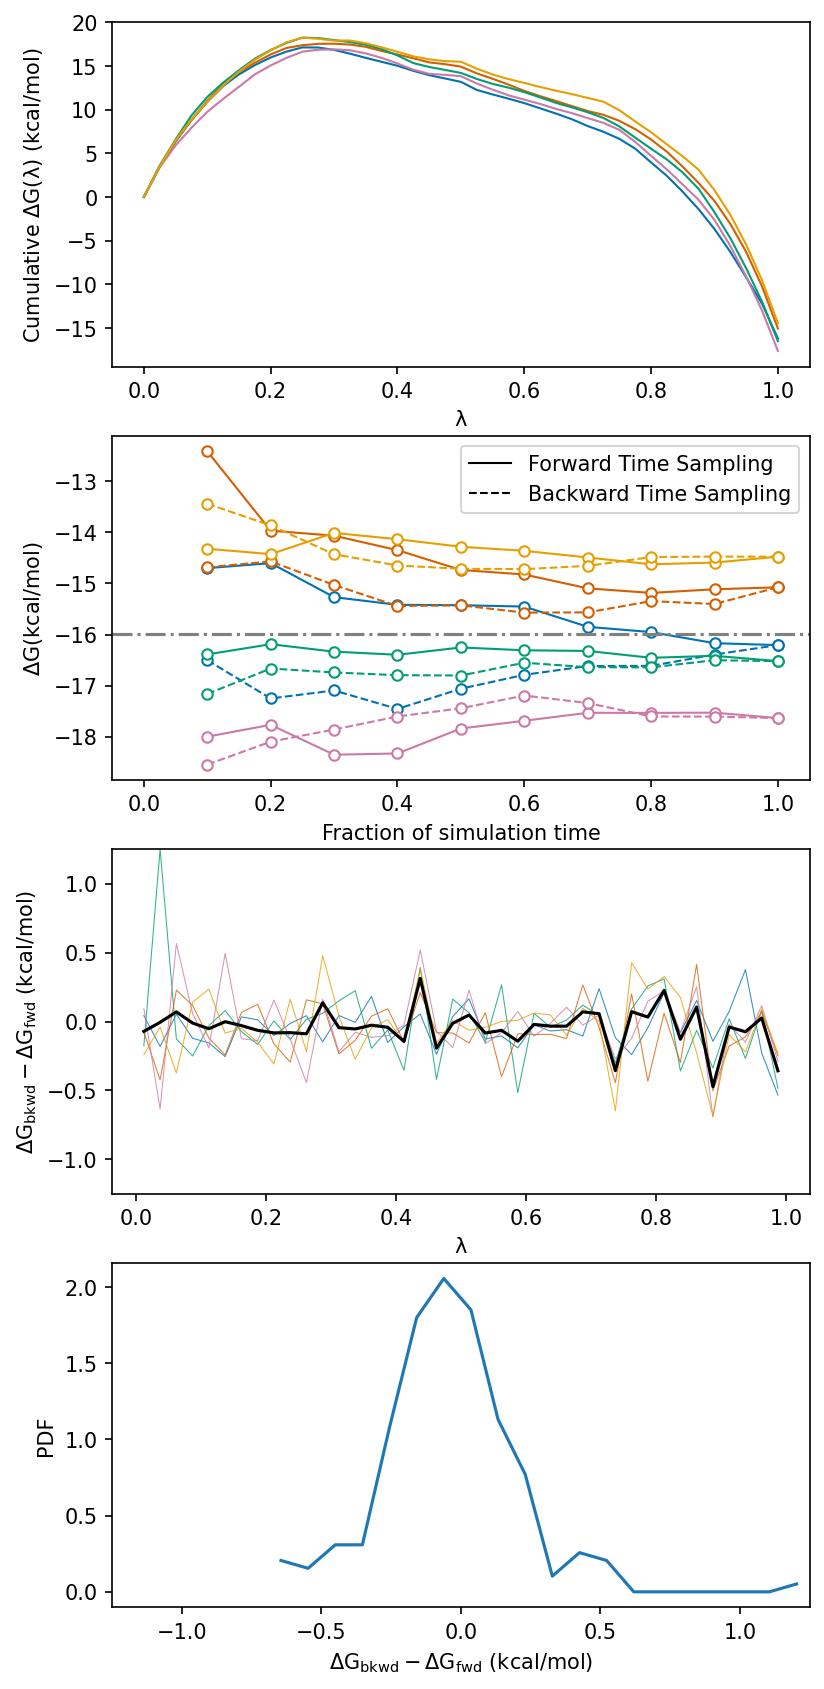

In [10]:
fig, (dGax, convax, hysax, pdfAx) = plt.subplots(4,1, sharex=False, sharey=False)

# Cumulative change in kT
for key in keys:
    dGax.plot(cumulative.index, cumulative[(key, 'f')]*RT, marker=None, label=key, linewidth=1, color=keyColors[key])
    dGax.set(xlabel=r'$\rm\lambda$', ylabel=r'Cumulative $\rm\Delta$G($\rm\lambda$) (kcal/mol)')
    #plt.legend()
    #plt.title(fr'Cumulative $\delta$Gs for {header}')

    
    
# Convergence plots
for l in [x for x in l0s if x != "mean"]:
    #plt.errorbar(np.arange(len(fs[l]))/len(fs[l])+0.1, np.multiply(fs[l], RT), yerr=np.multiply(fes[l], RT), marker='o', linewidth=1, color='mediumslateblue', markerfacecolor='white', markeredgewidth=1, markeredgecolor='mediumslateblue', ms=5)
    #plt.errorbar(np.arange(len(bs[l]))/len(fs[l])+0.1, np.multiply(bs[l], RT), yerr=np.multiply(bes[l], RT), marker='o', linewidth=1, color='red', markerfacecolor='white', markeredgewidth=1, markeredgecolor='red', ms=5)
    convax.plot(np.arange(len(fs[l]))/len(fs[l])+0.1, np.multiply(fs[l], RT), marker='o', linewidth=1, color=keyColors[l], markerfacecolor='white', markeredgewidth=1, markeredgecolor=keyColors[l], ms=5)
    convax.plot(np.arange(len(bs[l]))/len(fs[l])+0.1, np.multiply(bs[l], RT), marker='o', linewidth=1, color=keyColors[l], markerfacecolor='white', markeredgewidth=1, markeredgecolor=keyColors[l], ms=5, linestyle='--')

    
convax.set(xlabel='Fraction of simulation time', ylabel=r'$\rm\Delta G (kcal/mol)$')

#plt.plot(np.arange(len(fs[l]))/len(fs[l])+0.1, np.multiply(fs[l], RT), marker='o', linewidth=1, color=keyColors[l], markerfacecolor='white', markeredgewidth=1, markeredgecolor=keyColors[l], ms=5, label='Forward Time Sampling')
#plt.plot(np.arange(len(bs[l]))/len(fs[l])+0.1, np.multiply(bs[l], RT), marker='o', linewidth=1, color=keyColors[l], markerfacecolor='white', markeredgewidth=1, markeredgecolor=keyColors[l], ms=5, linestyle='--', label='Backward Time Sampling')



convax.xaxis.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])

finalMean = np.mean(cumulative.loc[1, (slice(None), 'f')])
convax.axhline(y= finalMean*RT, linestyle='-.', color='gray')
convax.plot(0, finalMean*RT, linewidth=1, color='black', label='Forward Time Sampling')
convax.plot(0, finalMean*RT, linewidth=1, color='black', linestyle='--', label='Backward Time Sampling')

convax.legend()


# Hysteresis plot
for key in u_nks:
    #plt.vlines(perWindow.index, np.zeros(len(perWindow)), perWindow[(key, 'dG_f')] + perWindow[(key, 'dG_b')], label=key, linewidth=2)
    hysax.plot(perWindow.index, perWindow[(key, 'diff')]*RT, label=key, linewidth=0.5, alpha=0.8, color=keyColors[key])

hysax.plot(perWindow.index, perWindow[('mean', 'diff')]*RT, label='mean', linewidth=1.5, color='black')

hysax.set(xlabel=r'$\rm\lambda$', ylabel=r'$\rm\Delta G_{bkwd}-\Delta G_{fwd}$ (kcal/mol)', ylim=(-1.25, 1.25))


# Hysteresis PDF
diff = perWindow.loc[:, (slice(None), 'diff')]*RT
X = diff.drop(columns='mean') #Including the mean in here would underestimate the skewness of the distribution
Y = np.arange(len(X))/len(X)
binNum = 20
pdfY, pdfX = np.histogram(X, bins=binNum, density=True)
pdfX = (pdfX[1:]+pdfX[:-1])/2


#plot the data
pdfAx.plot(pdfX, pdfY,  label="Estimated Distribution")
pdfAx.set(xlim=(-1.25, 1.25), ylabel='PDF', xlabel=r'$\rm\Delta G_{bkwd}-\Delta G_{fwd}$ (kcal/mol)')





fig.set_figheight(14)
#fig.tight_layout()
plt.savefig(f"{root}/{prefix}_ALL_{affix}.svg")